In [1]:
import fastdup
import pandas as pd
fastdup.__version__

/usr/bin/dpkg


'1.25'

In [2]:
data = pd.read_parquet('../data/preprocessed/filtered.parquet')

In [3]:
image_folder = '../data/train_v2'

In [4]:
images = [image_folder +'/'+ filename for filename in data['ImageId']]

In [5]:
fd = fastdup.create(work_dir="fastdup_work_dir/", input_dir=images)

In [6]:
fd.run(ccthreshold=0.99)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-12 15:03:39 [INFO] Going to loop over dir fastdup_work_dir/files.txt
2023-07-12 15:03:39 [INFO] Found total 42556 images to run on, 42556 train, 0 test, name list 42556, counter 42556 
2023-07-12 15:06:43 [INFO] Found total 42556 images to run onimated: 0 Minutes
Finished histogram 11.629
Finished bucket sort 11.799
2023-07-12 15:06:44 [INFO] 1661) Finished write_index() NN model
2023-07-12 15:06:44 [INFO] Stored nn model index file fastdup_work_dir/nnf.index
2023-07-12 15:06:46 [INFO] Total time took 186342 ms
2023-07-12 15:06:46 [INFO] Found a total of 3356 fully identical images (d>0.990), which are 3.94 %
2023-07-12 15:06:46 [INFO] Found a total of 6304 nearly identical images(d>0.980), which are 7.41 %
2023-07-12 15:06:46 [INFO] Found a total of 72748 above threshold images (d>0.900), which are 85.47 %
2023-07-12 15:06:46 [INFO] Found a total of 4255 outlier images         (d<0.050), which are 5.00 

0

In [7]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 42556 images
    Valid images are 100.00% (42,556) of the data, invalid are 0.00% (0) of the data
    Similarity:  2.77% (1,177) belong to 35 similarity clusters (components).
    97.23% (41,379) images do not belong to any similarity cluster.
    Largest cluster has 280 (0.66%) images.
    For a detailed analysis, use `.connected_components()`
(similarity threshold used is 0.9, connected component threshold used is 0.99).

    Outliers: 7.47% (3,180) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.


['Dataset contains 42556 images',
 'Valid images are 100.00% (42,556) of the data, invalid are 0.00% (0) of the data',
 'Similarity:  2.77% (1,177) belong to 35 similarity clusters (components).',
 '97.23% (41,379) images do not belong to any similarity cluster.',
 'Largest cluster has 280 (0.66%) images.',
 'For a detailed analysis, use `.connected_components()`\n(similarity threshold used is 0.9, connected component threshold used is 0.99).\n',
 'Outliers: 7.47% (3,180) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.']

In [8]:
broken_images = fd.invalid_instances()
broken_images

Empty DataFrame
Columns: [filename, index, error_code, is_valid, fd_index]
Index: []

In [9]:
list_of_broken_images = broken_images['filename'].to_list()
list_of_broken_images

[]

In [10]:
fd.vis.duplicates_gallery(num_images=5)

  0%|          | 0/5 [00:00<?, ?it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 5/5 [00:00<00:00, 28.93it/s]
Traceback (most recent call last):
  File "/home/mykyta/miniconda3/envs/tf/lib/python3.9/site-packages/fastdup/__init__.py", line 1104, in create_duplicates_gallery
    ret = do_create_duplicates_gallery(similarity_file, save_path, num_images, descending, lazy_load, get_label_func, slice, max_width, get_bounding_box_func,
  File "/home/mykyta/miniconda3/envs/tf/lib/python3.9/site-packages/fastdup/galleries.py", line 462, in do_create_duplicates_gallery
    assert len(subdf), "Error: failed to find any duplicates, try to run() with lower threshold"
AssertionError: Error: failed to fi

In [11]:
fd.vis.component_gallery(num_images=5)

  0%|          | 0/5 [00:00<?, ?it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Traceback (most recent call last):
  File "/home/mykyta/miniconda3/envs/tf/lib/python3.9/site-packages/fastdup/galleries.py", line 698, in load_one_image
    img = fastdup_imread(f, input_dir, kwargs)
  File "/home/mykyta/miniconda3/envs/tf/lib/python3.9/site-packages/fastdup/image.py", line 152, in fastdup_imread
    assert os.path.exists(input_dir), "Failed to find input_dir: " + input_dir
AssertionError: Failed to find input_dir: [PosixPath('../data/train_v2/000155de5.jpg'), PosixPath('../data/train_v2/000194a2d.jpg'), PosixPath('../data/train_v2/00021ddc3.jpg'), PosixPath('../data/train_v2/0002756f7.jpg'), PosixPath('../dat

In [12]:
connected_components_df , _ = fd.connected_components()
connected_components_df.head()

index  component_id     sum  count  mean_distance  min_distance  max_distance                        filename error_code  is_valid  fd_index
0      2             2  3.9938    4.0         0.9984        0.9984        0.9984  ../data/train_v2/00021ddc3.jpg      VALID      True         2
1     10            10  3.9705    4.0         0.9926        0.9926        0.9926  ../data/train_v2/000d42241.jpg      VALID      True        10
2     23            23  3.9979    4.0         0.9995        0.9995        0.9995  ../data/train_v2/001ed8b9b.jpg      VALID      True        23
3     33            33  3.9821    4.0         0.9955        0.9955        0.9955  ../data/train_v2/002d56570.jpg      VALID      True        33
4     54            54  3.9660    4.0         0.9915        0.9915        0.9915  ../data/train_v2/004f97cfb.jpg      VALID      True        54

In [13]:
def get_clusters(df, sort_by='count', min_count=2, ascending=False):
    agg_dict = {'filename': list, 'mean_distance': max, 'count': len}

    if 'label' in df.columns:
        agg_dict['label'] = list

    df = df[df['count'] >= min_count]

    grouped_df = df.groupby('component_id').agg(agg_dict)

    grouped_df = grouped_df.sort_values(by=[sort_by], ascending=ascending)
    return grouped_df

In [14]:
clusters_df = get_clusters(connected_components_df)
clusters_df.head()

filename  \
component_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
914           [../data/train_v2/05b5e6075.jpg, ../data/train_v2/09473c1f7.jpg, ../data/train_v2/0d510be9c.jpg, ../data/train_v2/104db95be.jpg, ../data/train_v2/13c329e23.jpg, ../data/train_v2/2049f597a.jpg, ../data/train_v2/23baa6f33.jpg, ../data/train_v2/283d4f549.jpg, ../data/train_v2/397c01724.jpg, ../data/train_v2/3a4c1c973.jpg, ../data/train_v2/3bcc868f8.jpg, ../data/train_v2/3d0b16a65.jpg, ../data/train_v2/43cee3daa.jpg, ../data/train_v2/43eafb132.jpg, ../data/train_v2/43f162b37.jpg, ../data/train_v2/477d7b21a.jpg, ../data/train_v2/4accacdaa.jpg, ../data/train_v2/4c9524e49.jpg, ../data/train_v2/507aadeb6.jpg, ../data/train_v2/5241789ba.jpg, ../data/train_v2/5545f84bc.jpg, ../data/train_v2/55bc6c214.jpg, ../data/train_v2/5a9f314cd.jpg, ../data/train_v2/60272f420.jpg, ../data/train_v2/63b2cc7dd.jpg, ../data/train_v2/6445210a1.jpg, ../data/train_v2/64d1e91a4.jpg, ../data/train_v2/6bb8afdec.jpg, ../data/train_v2/74e5c4de2.jpg, ../data/train_v2/765c2c9bb.jpg, ../data/train_v2/7c1d1bf36.jpg, ../data/train_v2/7ce65f479.jpg, ../data/train_v2/7f0630c55.jpg, ../data/train_v2/7fb7e5781.jpg, ../data/train_v2/811c37506.jpg, ../data/train_v2/8215bd664.jpg, ../data/train_v2/827f4e01e.jpg, ../data/train_v2/847924838.jpg, ../data/train_v2/89123a5f7.jpg, ../data/train_v2/891f7fbb8.jpg, ../data/train_v2/8b6898aaa.jpg, ../data/train_v2/8bd7533d9.jpg, ../data/train_v2/8caa41c0c.jpg, ../data/train_v2/8d6621c04.jpg, ../data/train_v2/8e65ca74e.jpg, ../data/train_v2/90fa20220.jpg, ../data/train_v2/91d9da9ba.jpg, ../data/train_v2/9aee8240b.jpg, ../data/train_v2/9d

In [15]:
cluster_images_to_keep = []
list_of_duplicates = []

for cluster_file_list in clusters_df.filename:
    keep = cluster_file_list[0]
    discard = cluster_file_list[1:]

    cluster_images_to_keep.append(keep)
    list_of_duplicates.extend(discard)

print(f"Found {len(set(list_of_duplicates))} highly similar images to discard")

Found 1655 highly similar images to discard


100%|██████████| 5/5 [00:00<00:00, 14990.36it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Stored outliers visual view in  fastdup_work_dir/galleries/outliers.html



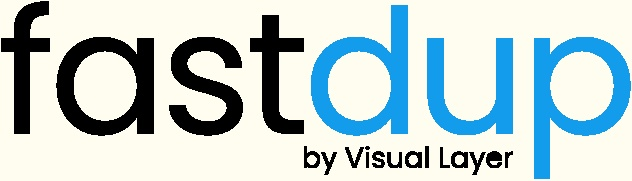

0

In [16]:
fd.vis.outliers_gallery(num_images=5)

In [17]:
outlier_df = fd.outliers()
outlier_df.head()

outlier  nearest  distance                filename_outlier  index_x error_code_outlier  is_valid_outlier  fd_index_outlier                filename_nearest  index_y error_code_nearest  is_valid_nearest  fd_index_nearest
0    19810    41797  0.676471  ../data/train_v2/76e04d4cc.jpg    19810              VALID              True             19810  ../data/train_v2/fb76963b8.jpg    41797              VALID              True             41797
1     5408    41631  0.703473  ../data/train_v2/209b63592.jpg     5408              VALID              True              5408  ../data/train_v2/fa7f06a3a.jpg    41631              VALID              True             41631
2      476    19054  0.703690  ../data/train_v2/02e6a2a59.jpg      476              VALID              True               476  ../data/train_v2/7280c72f1.jpg    19054              VALID              True             19054
3     9433     9289  0.706389  ../data/train_v2/395e86697.jpg     9433              VALID              True              9433  ../data/train_v2/38669c62c.jpg     9289              VALID              True              9289
4    42312     7387  0.707717  ../data/train_v2/fe98475e6.jpg    42312              VALID              True             42312  ../data/train_v2/2c801fe3b.jpg     7387              VALID              True              7387

In [18]:
list_of_outliers = outlier_df[outlier_df.distance < 0.68].filename_outlier.tolist()
list_of_outliers

['../data/train_v2/76e04d4cc.jpg']

100%|██████████| 5/5 [00:00<00:00, 61.20it/s]

Stored mean visual view in  fastdup_work_dir/galleries/mean.html



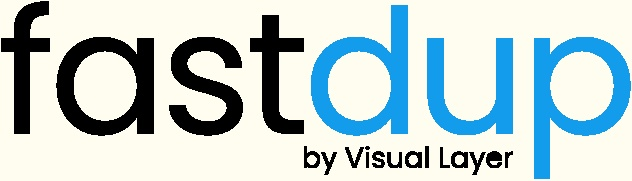
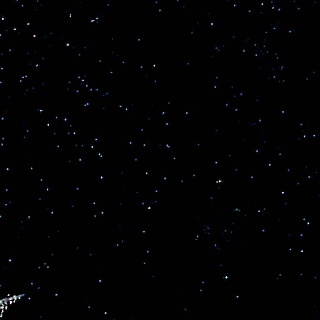
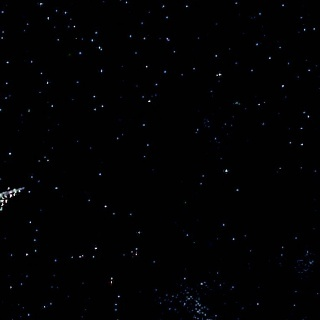
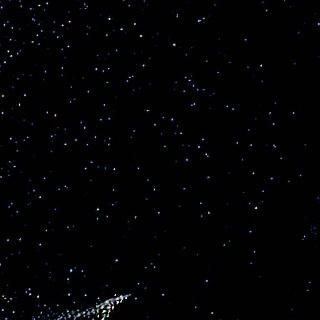
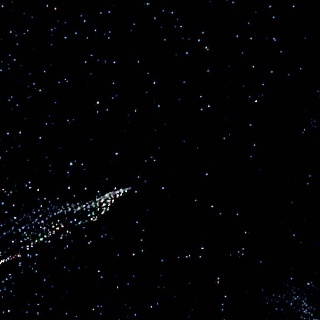
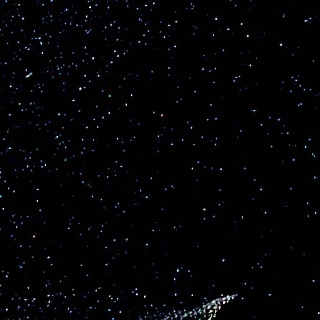

0

In [19]:
fd.vis.stats_gallery(metric='dark', num_images=5)

In [20]:
stats_df = fd.img_stats()

In [21]:
dark_images = stats_df[stats_df['mean'] < 13]
dark_images

index  img_w  img_h  unique       blur     mean  min    max     stdv  file_size  contrast                        filename error_code  is_valid  fd_index
341      341    768    768      58    82.7099  12.3509  0.0  250.0   2.2303      71966       1.0  ../data/train_v2/0221587f9.jpg      VALID      True       341
665      665    768    768      47    70.5045  12.6127  0.0  239.0   2.1141      78131       1.0  ../data/train_v2/04195aa0f.jpg      VALID      True       665
805      805    768    768      54    44.0835  12.5777  0.0   78.0   1.6264      73107       1.0  ../data/train_v2/0510a3765.jpg      VALID      True       805
852      852    768    768     146   174.2606  12.6625  0.0  250.0   3.9335      79475       1.0  ../data/train_v2/055ceb1c0.jpg      VALID      True       852
971      971    768    768     177   427.2943  12.6768  0.0  195.0  12.0867     118587       1.0  ../data/train_v2/060ea266e.jpg      VALID      True       971
...      ...    ...    ...     ...        ...      ...  ...    ...      ...        ...       ...                             ...        ...       ...       ...
42179  42179    768    768     138    76.2300  12.7951  0.0  179.0   3.9553      46224       1.0  ../data/train_v2/fdca29d51.jpg      VALID      True     42179
42237  42237    768    768     110   151.1548  12.7187  0.0  253.0   3.6768      77886       1.0  ../data/train_v2/fe2dcd957.jpg      VALID      True     42237
42244  42244    768    768     191   178.3254   8.4637  0.0  241.0   9.6145      56627       1.0  ../data/train_v2/fe33e75e3.jpg      VALID      True     42244
42450  42450    768    768     177  1659.1111  12.9011  0.0  252.0  10.9331     200865       1.0  ../data/train_v2/ff5cad4bd.jpg      VALID      True     42450
42458  42458    768    768     217   611.8588  12.7921  0.0  255.0   9.6521     135791       1.0  ../data/train_v2/ff62ddad4.jpg      VALID      True     42458

[304 rows x 15 columns]

In [22]:
list_of_dark_images = dark_images['filename'].to_list()
list_of_dark_images

['../data/train_v2/0221587f9.jpg',
 '../data/train_v2/04195aa0f.jpg',
 '../data/train_v2/0510a3765.jpg',
 '../data/train_v2/055ceb1c0.jpg',
 '../data/train_v2/060ea266e.jpg',
 '../data/train_v2/061047ae0.jpg',
 '../data/train_v2/072fa220f.jpg',
 '../data/train_v2/09473c1f7.jpg',
 '../data/train_v2/0acf5fee5.jpg',
 '../data/train_v2/0b1bc8662.jpg',
 '../data/train_v2/0b526035b.jpg',
 '../data/train_v2/0cd99c8b9.jpg',
 '../data/train_v2/0ce22b8a7.jpg',
 '../data/train_v2/0cf84269c.jpg',
 '../data/train_v2/0d52c3bca.jpg',
 '../data/train_v2/0d6041881.jpg',
 '../data/train_v2/0e6645918.jpg',
 '../data/train_v2/0f51f41cd.jpg',
 '../data/train_v2/10d3d146c.jpg',
 '../data/train_v2/11bdd3b25.jpg',
 '../data/train_v2/1207f0028.jpg',
 '../data/train_v2/1229ec7a9.jpg',
 '../data/train_v2/12d52354f.jpg',
 '../data/train_v2/12f127f30.jpg',
 '../data/train_v2/13528840a.jpg',
 '../data/train_v2/13c329e23.jpg',
 '../data/train_v2/13d3773a6.jpg',
 '../data/train_v2/166353950.jpg',
 '../data/train_v2/1

100%|██████████| 5/5 [00:00<00:00, 35.13it/s]


Stored mean visual view in  fastdup_work_dir/galleries/mean.html



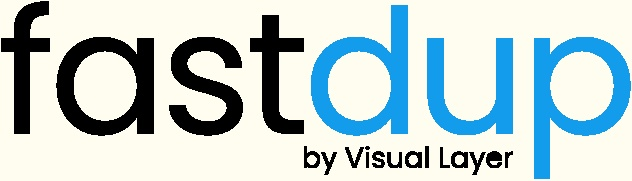
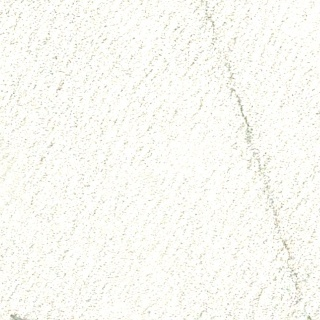
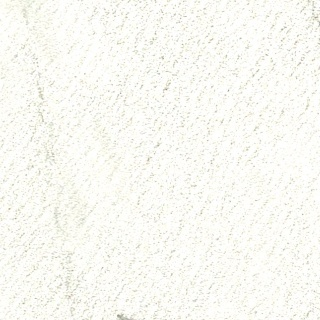
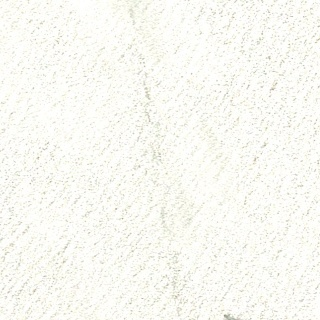
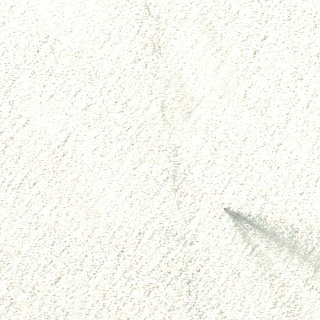
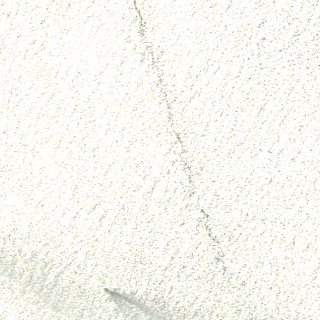

0

In [23]:
fd.vis.stats_gallery(metric='bright', num_images=5)

In [24]:
bright_images = stats_df[stats_df['mean'] > 220.5]
bright_images.head()

index  img_w  img_h  unique       blur      mean    min    max     stdv  file_size  contrast                        filename error_code  is_valid  fd_index
448     448    768    768     113  2726.9651  240.0416  129.0  255.0  15.0326     197703    0.3281  ../data/train_v2/02c371954.jpg      VALID      True       448
902     902    768    768     185  7751.2212  227.8219   53.0  255.0  21.4242     244755    0.6558  ../data/train_v2/059805048.jpg      VALID      True       902
1541   1541    768    768     251  4085.9231  222.6189    0.0  255.0  24.7175     205542    1.0000  ../data/train_v2/0964d424c.jpg      VALID      True      1541
2277   2277    768    768     126  2374.8601  232.1993  109.0  255.0  14.4359     186861    0.4011  ../data/train_v2/0db490e4c.jpg      VALID      True      2277
2614   2614    768    768     128  3221.6514  222.0897  112.0  255.0  16.6673     198583    0.3896  ../data/train_v2/0fa355c77.jpg      VALID      True      2614

In [25]:
list_of_bright_images = bright_images['filename'].to_list()
list_of_bright_images

['../data/train_v2/02c371954.jpg',
 '../data/train_v2/059805048.jpg',
 '../data/train_v2/0964d424c.jpg',
 '../data/train_v2/0db490e4c.jpg',
 '../data/train_v2/0fa355c77.jpg',
 '../data/train_v2/104083aa3.jpg',
 '../data/train_v2/12a9eb4dd.jpg',
 '../data/train_v2/12d2bfe9b.jpg',
 '../data/train_v2/12dc83fcd.jpg',
 '../data/train_v2/158295623.jpg',
 '../data/train_v2/15e8f1c5e.jpg',
 '../data/train_v2/1e4407baa.jpg',
 '../data/train_v2/2039ab602.jpg',
 '../data/train_v2/2231e8a94.jpg',
 '../data/train_v2/22ddc53d2.jpg',
 '../data/train_v2/2531107e2.jpg',
 '../data/train_v2/28adfe7c3.jpg',
 '../data/train_v2/2b81cf769.jpg',
 '../data/train_v2/2f7868854.jpg',
 '../data/train_v2/3224933c1.jpg',
 '../data/train_v2/327f24286.jpg',
 '../data/train_v2/3685f7883.jpg',
 '../data/train_v2/3a96a0dba.jpg',
 '../data/train_v2/412276aeb.jpg',
 '../data/train_v2/41841b013.jpg',
 '../data/train_v2/418943434.jpg',
 '../data/train_v2/41f1cf106.jpg',
 '../data/train_v2/462b33d3b.jpg',
 '../data/train_v2/4

100%|██████████| 5/5 [00:00<00:00, 60.48it/s]


Stored blur visual view in  fastdup_work_dir/galleries/blur.html



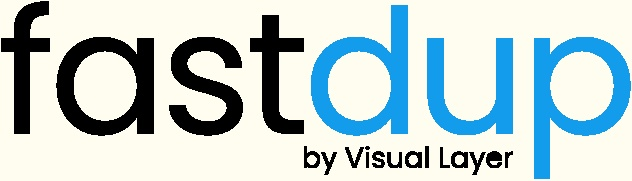
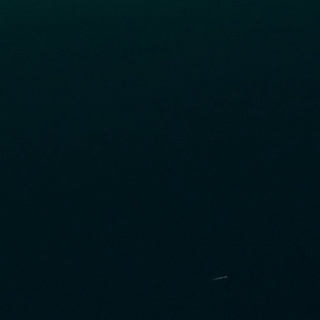
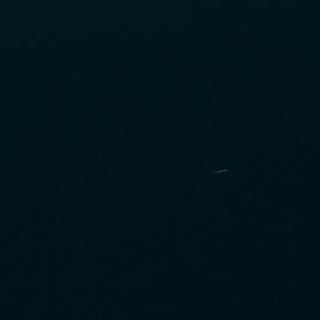
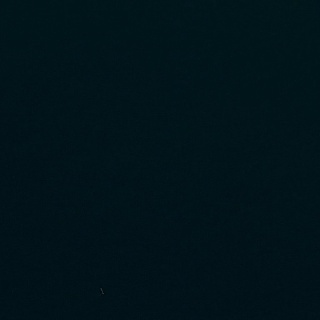
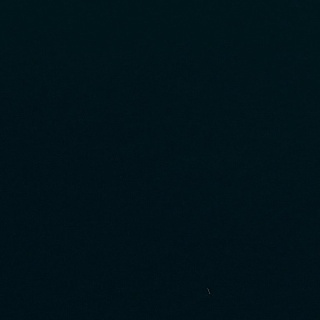
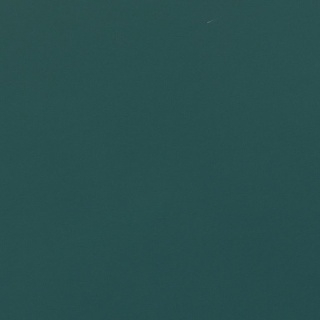

0

In [26]:
fd.vis.stats_gallery(metric='blur', num_images=5)

In [27]:
blurry_images = stats_df[stats_df['blur'] < 50]
blurry_images.head()

index  img_w  img_h  unique     blur     mean   min    max    stdv  file_size  contrast                        filename error_code  is_valid  fd_index
10      10    768    768      63  37.8765  48.5226  12.0   98.0  4.3748      67505    0.7818  ../data/train_v2/000d42241.jpg      VALID      True        10
37      37    768    768      73  49.8547  64.1222  28.0  123.0  4.0161      76133    0.6291  ../data/train_v2/00319c32d.jpg      VALID      True        37
70      70    768    768      70  44.5534  34.1153   6.0  124.0  1.7651      70136    0.9077  ../data/train_v2/0064956d4.jpg      VALID      True        70
117    117    768    768      61  43.3793  33.9192   5.0   88.0  1.7087      70928    0.8925  ../data/train_v2/00c2c8539.jpg      VALID      True       117
330    330    768    768      86  42.9760  92.3239  55.0  167.0  9.3190      65051    0.5045  ../data/train_v2/0209f50e1.jpg      VALID      True       330

In [28]:
list_of_blurry_images = blurry_images['filename'].to_list()
list_of_blurry_images

['../data/train_v2/000d42241.jpg',
 '../data/train_v2/00319c32d.jpg',
 '../data/train_v2/0064956d4.jpg',
 '../data/train_v2/00c2c8539.jpg',
 '../data/train_v2/0209f50e1.jpg',
 '../data/train_v2/031414527.jpg',
 '../data/train_v2/031d5ef4e.jpg',
 '../data/train_v2/037727c67.jpg',
 '../data/train_v2/042c8028f.jpg',
 '../data/train_v2/04d28ccdf.jpg',
 '../data/train_v2/0510a3765.jpg',
 '../data/train_v2/0565dd193.jpg',
 '../data/train_v2/0570217ba.jpg',
 '../data/train_v2/05d5d3d93.jpg',
 '../data/train_v2/05f4eef7e.jpg',
 '../data/train_v2/069209911.jpg',
 '../data/train_v2/06d298a22.jpg',
 '../data/train_v2/071127598.jpg',
 '../data/train_v2/0731d41dc.jpg',
 '../data/train_v2/07d67474d.jpg',
 '../data/train_v2/080acb97a.jpg',
 '../data/train_v2/0894a6c89.jpg',
 '../data/train_v2/08e1caafe.jpg',
 '../data/train_v2/095559f6b.jpg',
 '../data/train_v2/09e183b5a.jpg',
 '../data/train_v2/0a225f257.jpg',
 '../data/train_v2/0a3d3abfb.jpg',
 '../data/train_v2/0af61c5c7.jpg',
 '../data/train_v2/0

In [30]:
print(f"Broken: {len(list_of_broken_images)}")
print(f"Duplicates: {len(list_of_duplicates)}")
print(f"Outliers: {len(list_of_outliers)}")
print(f"Dark: {len(list_of_dark_images)}")
print(f"Bright: {len(list_of_bright_images)}")
print(f"Blurry: {len(list_of_blurry_images)}")

problem_images = list_of_duplicates + list_of_broken_images + list_of_outliers + list_of_dark_images + list_of_bright_images + list_of_blurry_images

print(f"Total problem images: {len(set(problem_images))}")

Broken: 0
Duplicates: 1655
Outliers: 1
Dark: 304
Bright: 131
Blurry: 779
Total problem images: 2602
